In [150]:
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"Matplotlib {mpl.__version__}" )

Python 3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]
Pandas 1.3.5
NumPy 1.21.6
Matplotlib 3.2.2


In [151]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [170]:
data = pd.read_csv('raw_data.csv')

In [171]:
data.isnull().any()

year                            False
month                           False
region                          False
province                        False
thai_visitors                    True
foreign_visitors                False
income_from_thai_visitors        True
income_from_foreign_visitors    False
dtype: bool

In [172]:
data.loc[data['thai_visitors'].isnull(), 'thai_visitors'] = 0
data.loc[data['income_from_thai_visitors'].isnull(), 'income_from_thai_visitors'] = 0

In [173]:
data = data.astype({"thai_visitors":'int', "foreign_visitors":'int'}) 
data["thai_and_foreign_visitors"] = data["thai_visitors"] + data["foreign_visitors"]

In [284]:
result = pd.DataFrame({'mean' : data.groupby( [ "month","province" ] ) [["thai_and_foreign_visitors"]].apply(lambda x: x['thai_and_foreign_visitors'].mean())})
result = result.reset_index()

In [285]:
monthLabels = pd.DataFrame({'count' : result.groupby( ['month'] ).size()}).reset_index()

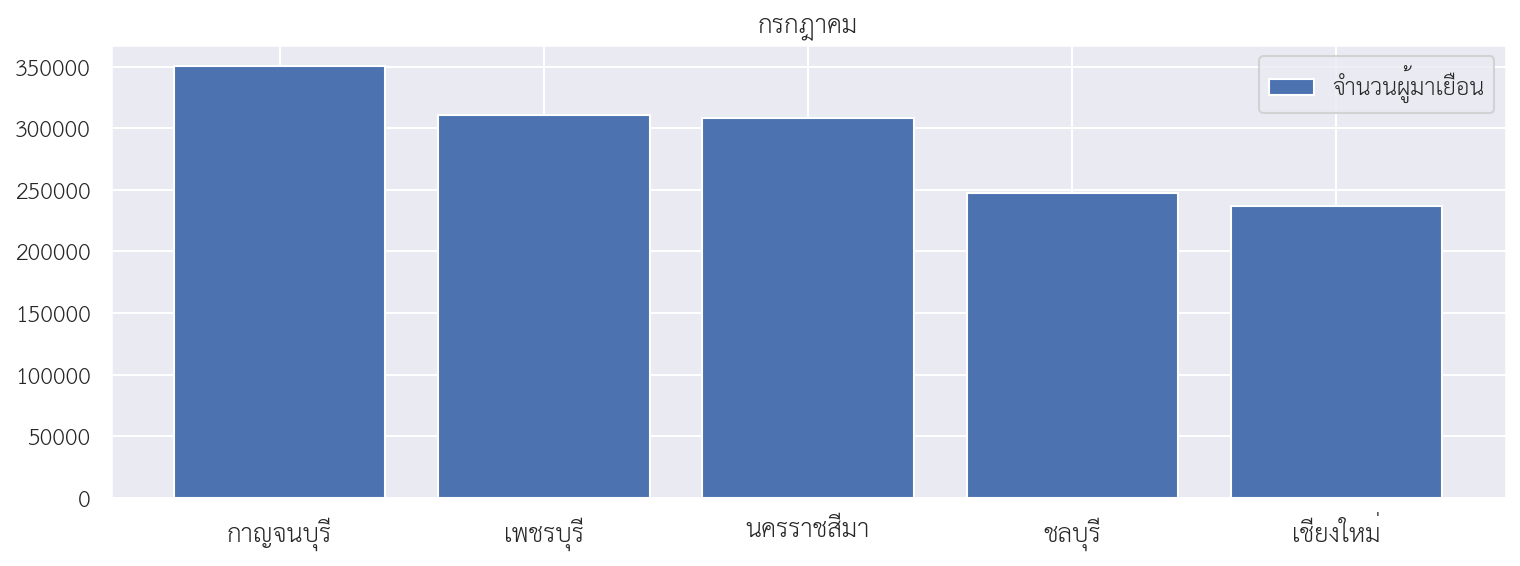

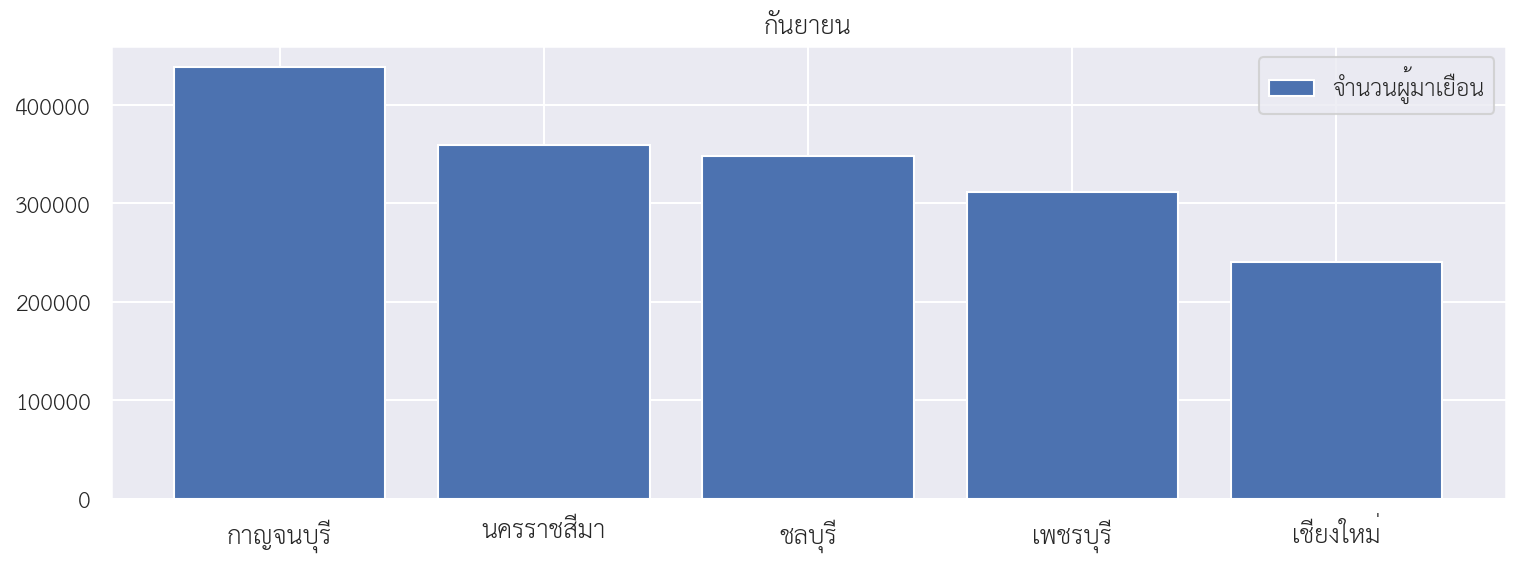

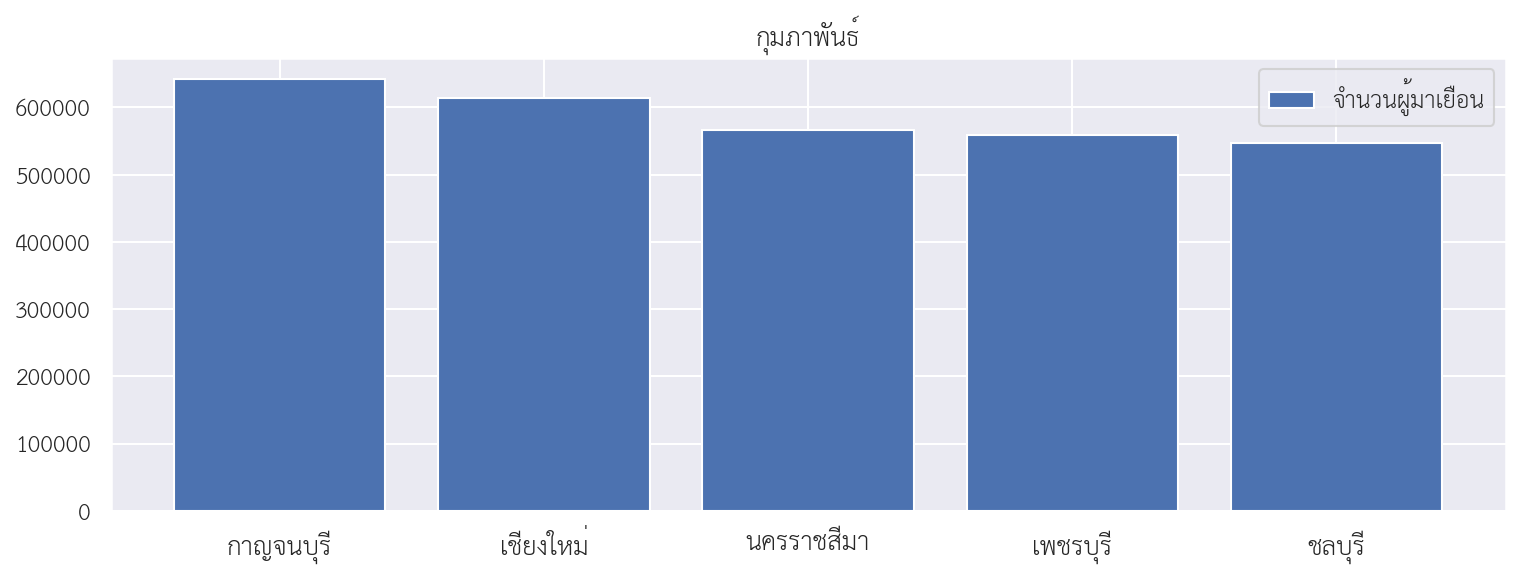

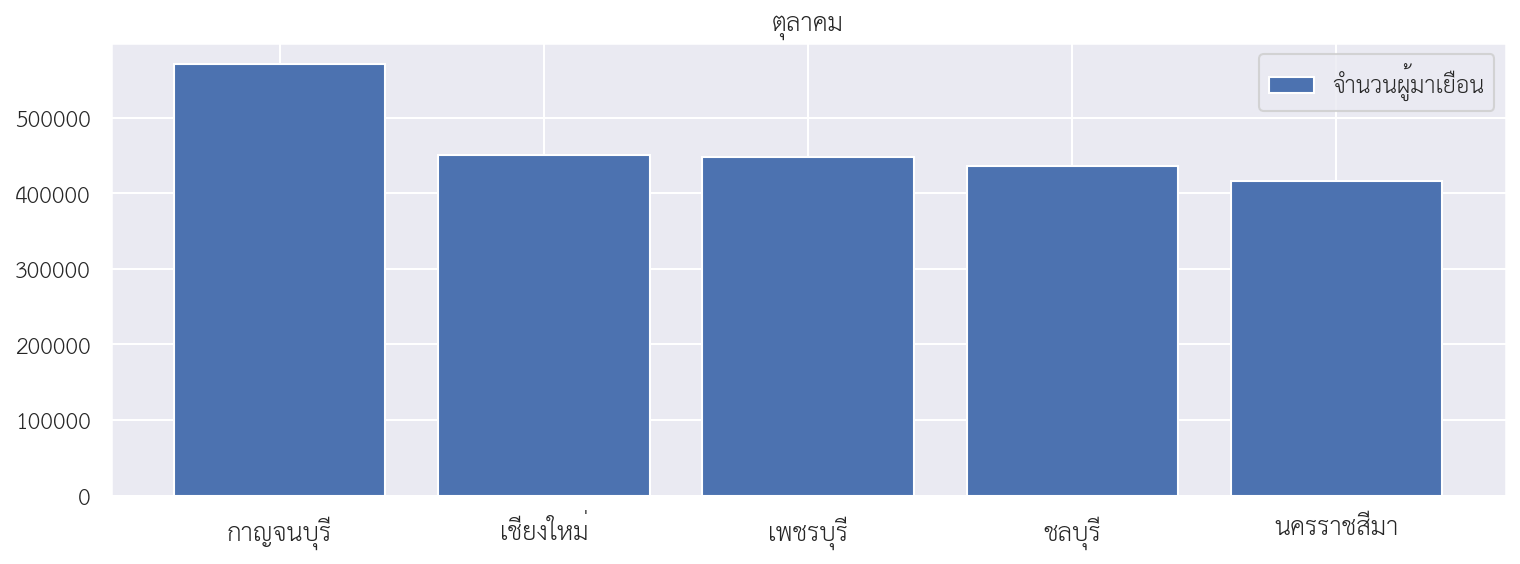

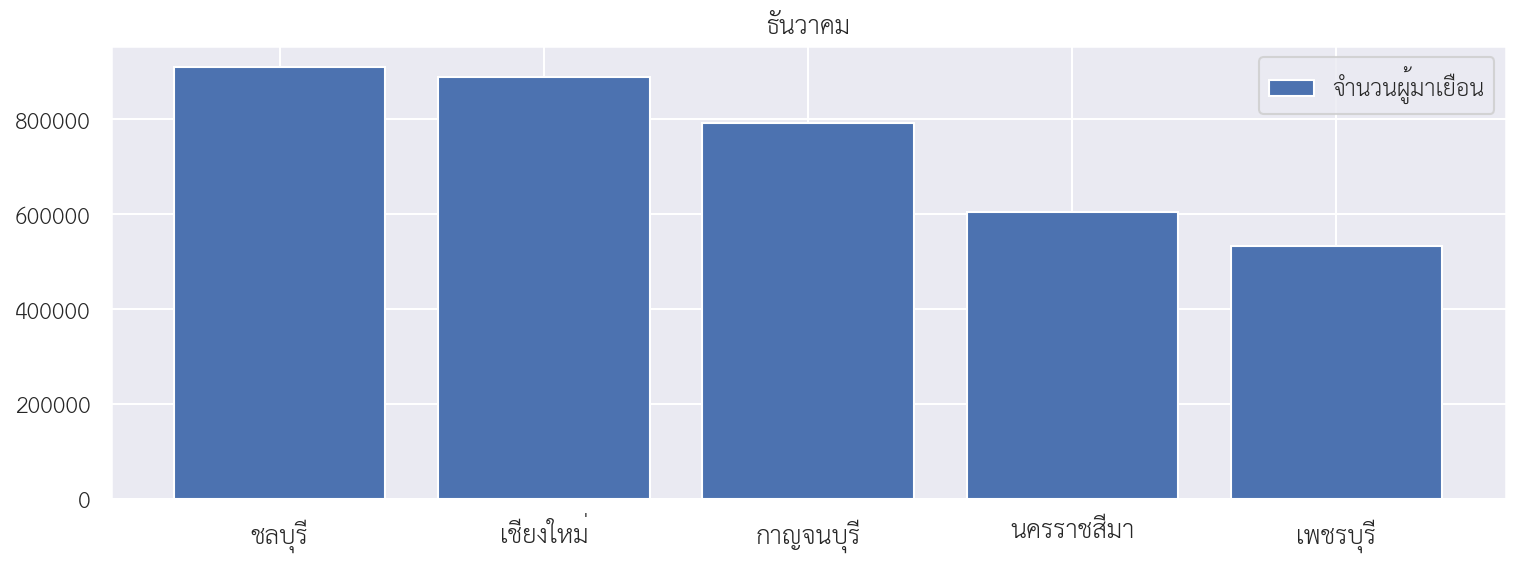

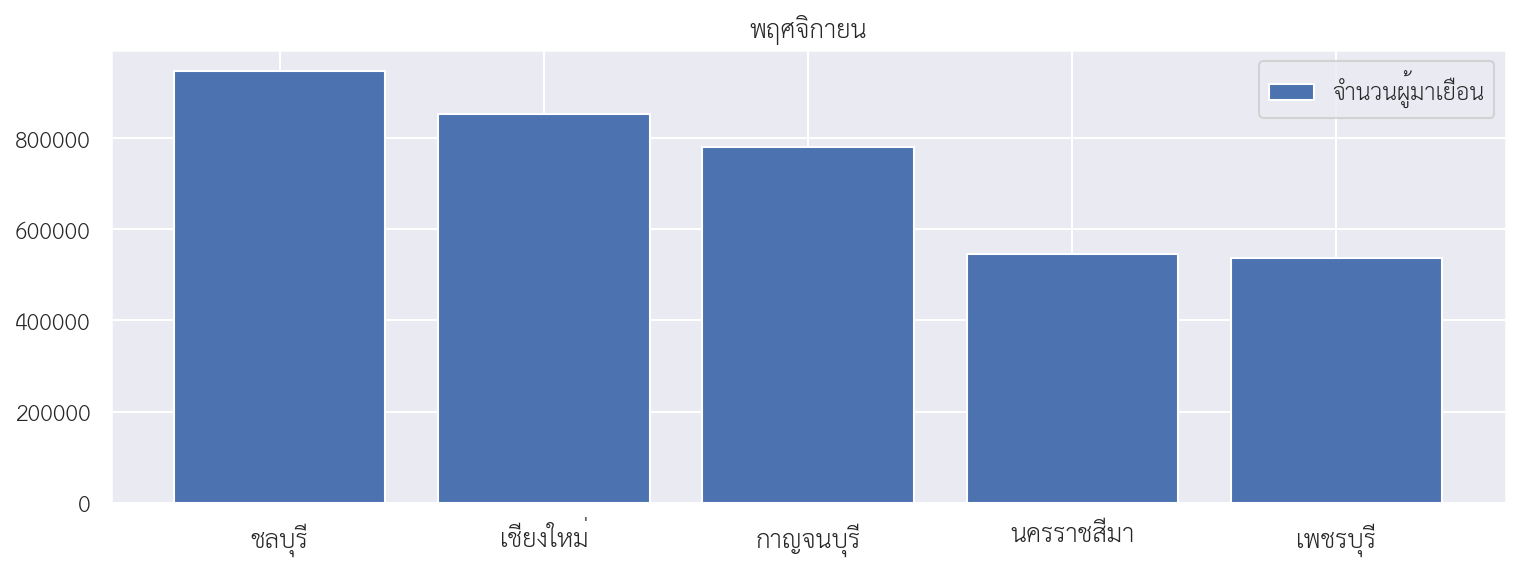

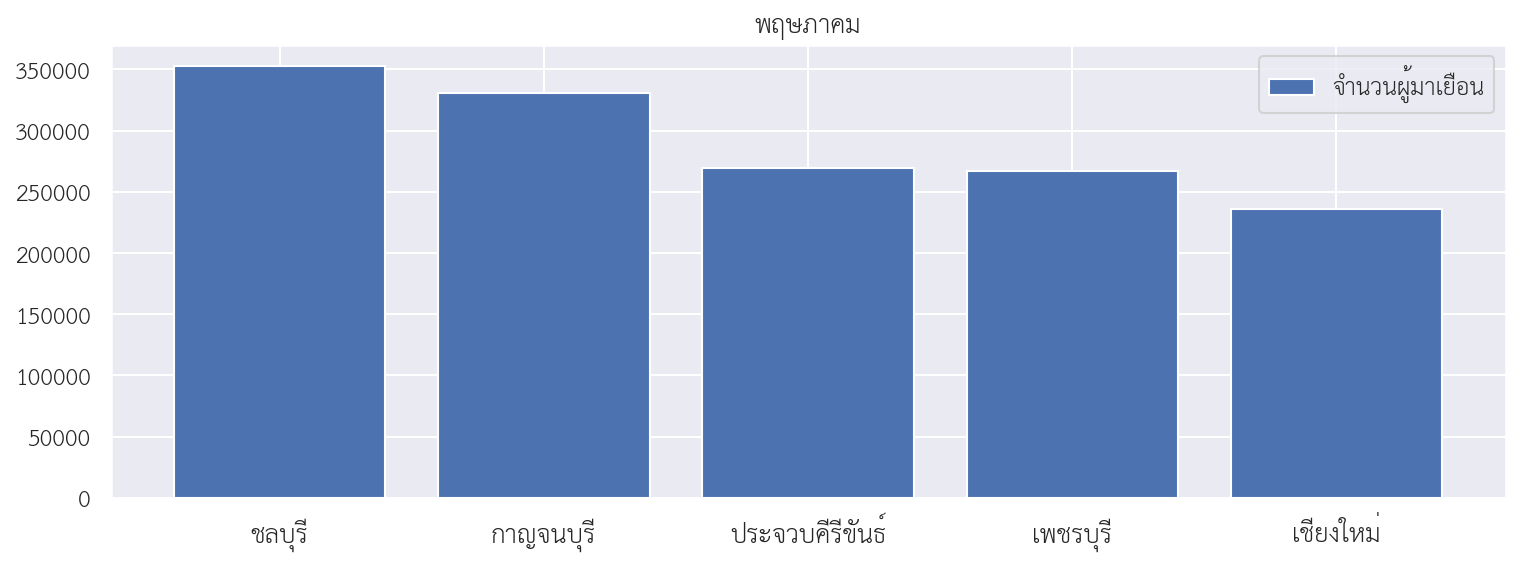

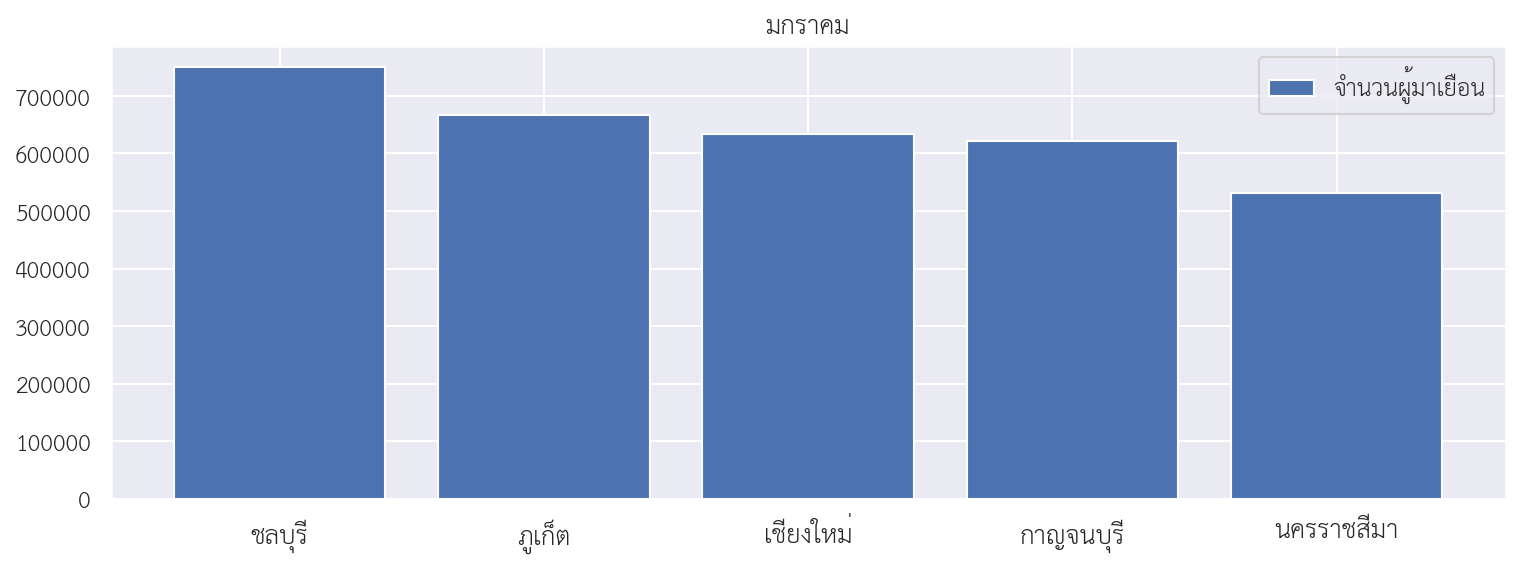

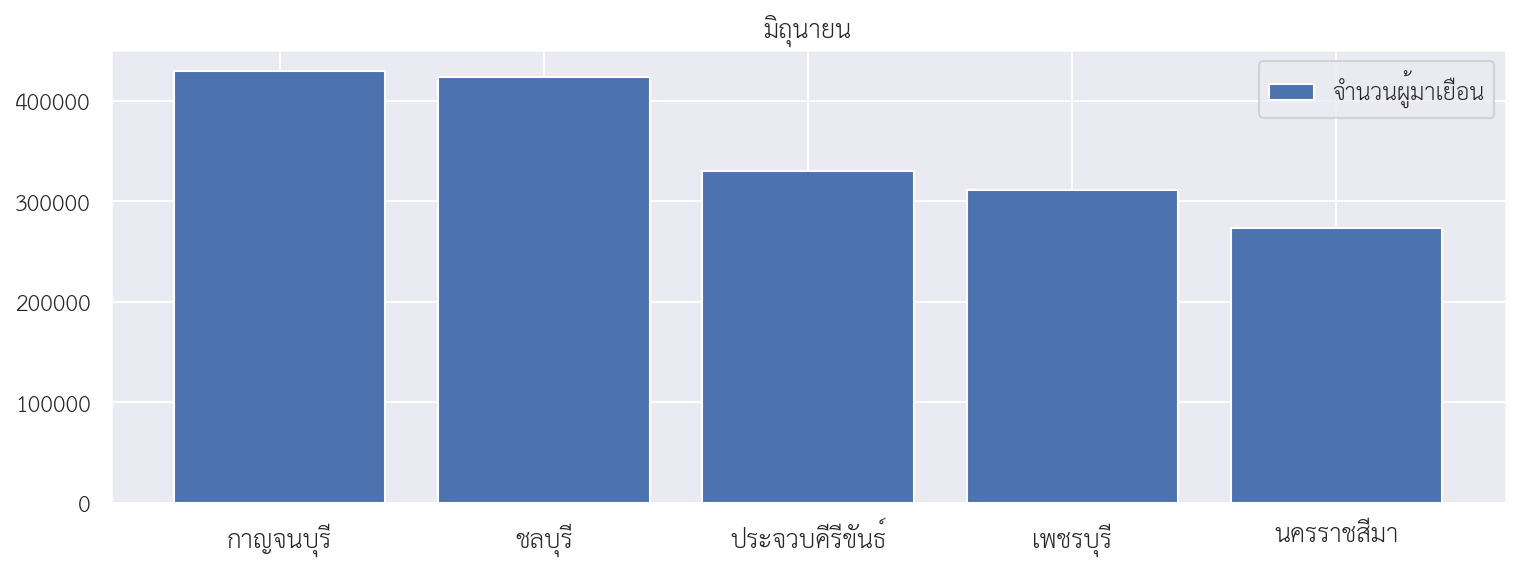

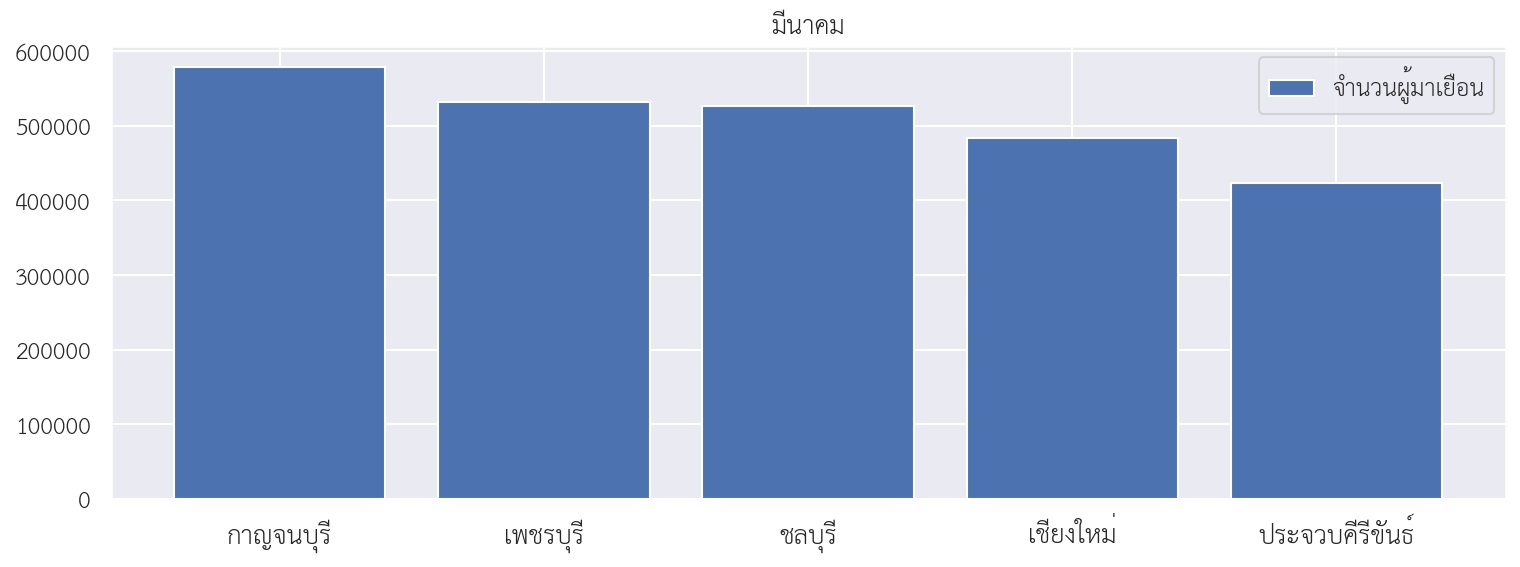

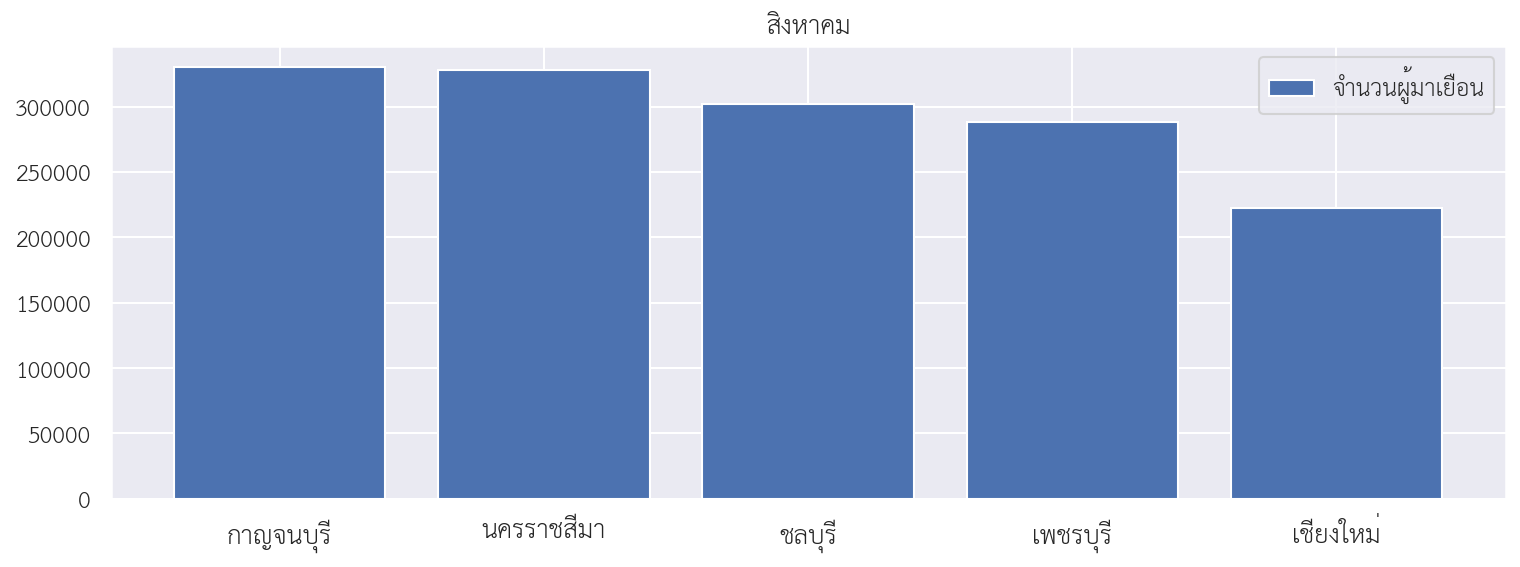

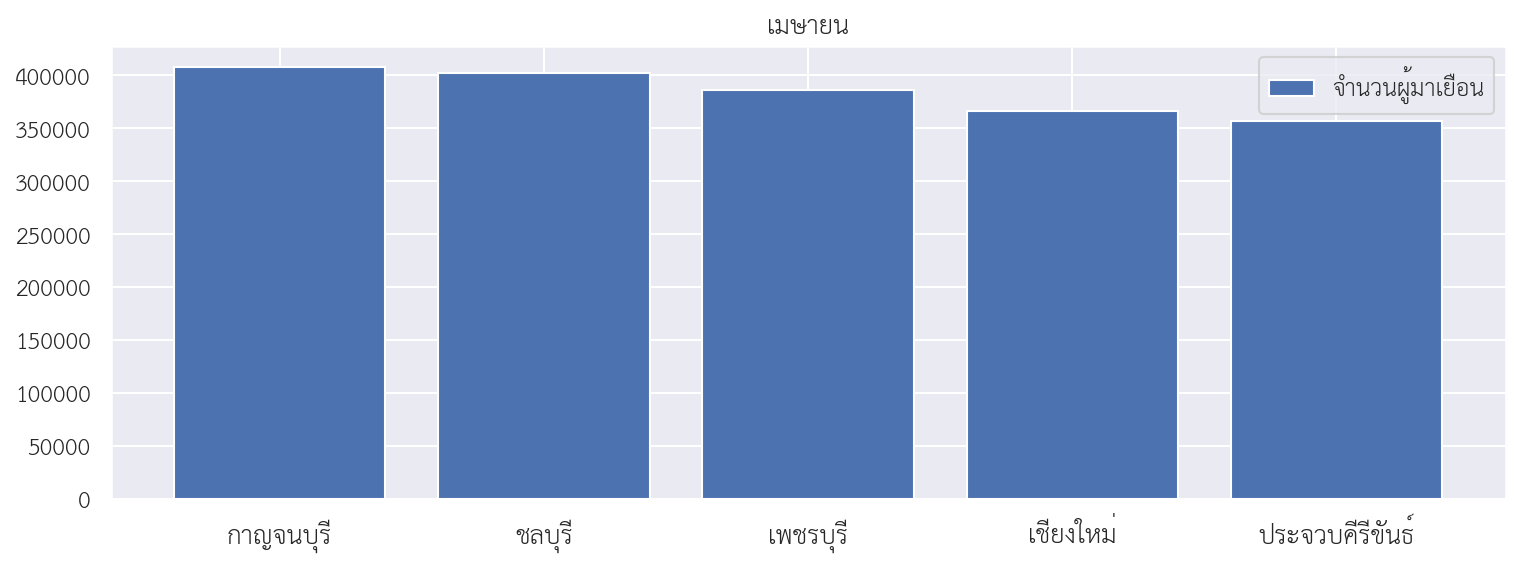

In [286]:
for w in monthLabels["month"].values.tolist():
  valueInMonth = result.loc[(result["month"] == w) & (result["province"] != "กรุงเทพมหานคร"), :].sort_values( ['mean'], ascending=[False] ).head()
  labels = valueInMonth['province'].values.tolist()
  type1value = []
  for x in labels:
    value1 = valueInMonth.loc[valueInMonth['province'] == x, :]

    if (not value1.empty):
      type1value.append(int(value1['mean']))

  item = np.arange(len(labels))


  fig, ax = plt.subplots(figsize=(12,4), dpi=150) 
  ax.bar(labels, type1value, label='จำนวนผู้มาเยือน')
  ax.set_title(w)
  ax.set_xticks(item)

  ax.set_xticklabels(labels, fontsize=12)
  ax.legend()


  plt.show() 